/mnt/OpenFormat


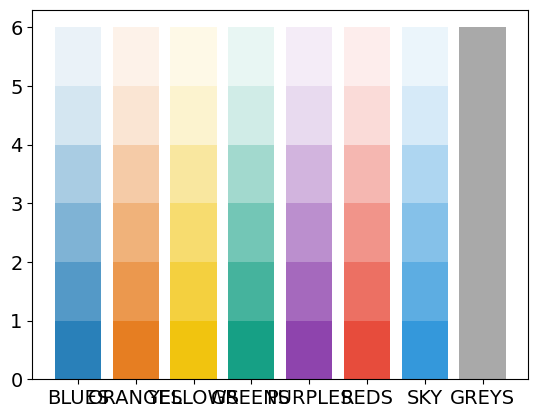

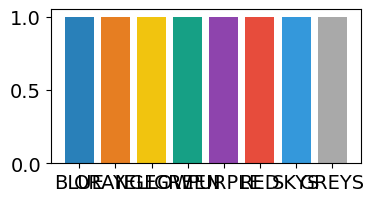

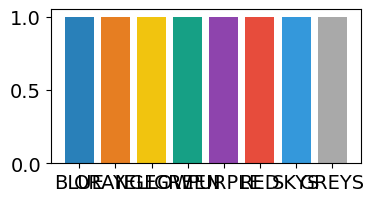

<Figure size 400x200 with 0 Axes>

In [7]:
import json
import os
import sys
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import pathlib
dir_path = pathlib.Path(os.path.abspath('')).parent.resolve()
print(dir_path)
HOME_DIR = str(dir_path).split('/OpenFormat')[0]
PROJ_SRC_DIR = f'{HOME_DIR}/OpenFormat'
sys.path.insert(1, f'{PROJ_SRC_DIR}')
from python.scripts.utils import *
# from user_def_exp import *
matplotlib.rcParams.update({'font.size': 14})
from stylelib import *
from process_helper import *
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(5)
_, line_colors = select_color_idx(5)


In [8]:
name =  'outputs/general_exp.csv'


# name = 'outputs/nvme_sync_new_simd.csv'
os.chdir(f'{PROJ_SRC_DIR}/python/')
df = pd.read_csv(name)
df_avg = df.groupby(['workload', 'file'], as_index=False).mean().set_index(['workload', 'file'])
# print(df_avg)
# print(sorted(list(set(df_avg['device'].values))))
# d_list = ['gp2', 'th125', 'th250', 'th500', 'th750', 'th1000', 'nvme']
# d_list = ['gp2', 'sc1', 'st1','th125', 'th250', 'th500', 'th750', 'th1000', 'nvme']
# d_list = ['th125', 'th250', 'th500', 'th750', 'th1000', 'nvme']
w_list = list(set(df['workload'].values))
w_list.sort()
w_list.remove('core')
w_list.insert(0, 'core')
print(df_avg.loc['ml', 'orc'])
bar_width = 0.3

i            4.500000e+00
size         1.004423e+08
read_time    5.377086e-01
Name: (ml, orc), dtype: float64


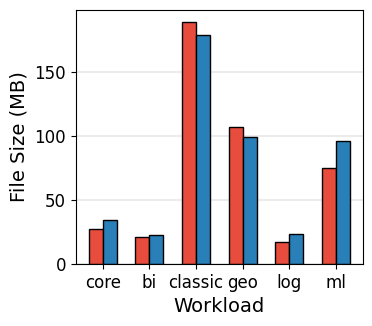

In [9]:
colors = ['sandybrown','seagreen','peachpuff','darkseagreen']
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
pq_size = []
orc_size = []
for w in w_list:
    pq_size.append(df_avg.loc[w, 'parquet']['size']/1024/1024)
    orc_size.append(df_avg.loc[w, 'orc']['size']/1024/1024)
        
fig, ax = plt.subplots(figsize=(3.7, 3.3))
ab_bar_list = [ax.bar(w_list, pq_size, align='edge', edgecolor='black', width=-bar_width, color=bar_colors[C_PQ])]

cd_bar_list = [ax.bar(w_list, orc_size, align='edge', edgecolor='black',width= bar_width, color=bar_colors[C_ORC])]
# set fig size

ax.set_xlabel('Workload')
ax.set_ylabel('File Size (MB)')
ax.set_axisbelow(True)
ax.grid(axis='y', linewidth=0.35)
legend = ax.legend(['Parquet', 'ORC'], bbox_to_anchor=((1.02,1.0)), frameon=False, ncol=2)

export_legend(legend, "figures/general_size_v2_legend.pdf")
legend.remove()

ax.tick_params(axis='both', which='major', labelsize=12)
# ax.tick_params(axis='both', which='minor', labelsize=8)
# ax.set_title(f'General File Size Comparison')
plt.savefig(f'figures/general_size_v2.pdf', bbox_inches='tight')
plt.show()

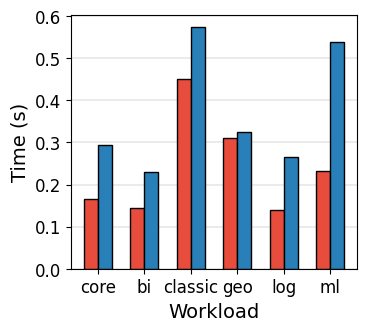

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
pq_size = []
orc_size = []
for w in w_list:
    pq_size.append(df_avg.loc[w, 'parquet']['read_time'])
    orc_size.append(df_avg.loc[w, 'orc']['read_time'])
        
fig, ax = plt.subplots(figsize=(3.7, 3.3))
ab_bar_list = [ax.bar(w_list, pq_size, align='edge', edgecolor='black', width=-bar_width, color=bar_colors[C_PQ])]

cd_bar_list = [ax.bar(w_list, orc_size, align='edge', edgecolor='black',width= bar_width, color=bar_colors[C_ORC])]
# set fig size

ax.set_xlabel('Workload')
ax.set_ylabel('Time (s)')
ax.set_axisbelow(True)
ax.grid(axis='y', linewidth=0.35)
ax.tick_params(axis='both', which='major', labelsize=12)
# ax.legend(['Parquet', 'ORC'])
# ax.set_title(f'General Scan Time Comparison')
plt.savefig(f'figures/general_time_v2.pdf', bbox_inches='tight')
plt.show()

# general filter

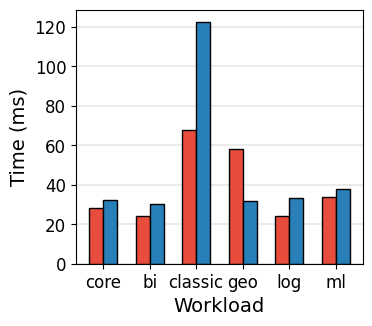

In [11]:
name =  'outputs/general_filter.csv' 

os.chdir(f'{PROJ_SRC_DIR}/python/')
df = pd.read_csv(name)
df_avg = df.groupby(['wl', 'format'], as_index=False).mean().set_index(['wl', 'format'])
import matplotlib.pyplot as plt
pq_size = []
orc_size = []
for w in w_list:
    pq_size.append(df_avg.loc[w, 'parquet']['time'])
    orc_size.append(df_avg.loc[w, 'orc']['time'])
    
fig, ax = plt.subplots(figsize=(3.7, 3.3))
ab_bar_list = [ax.bar(w_list, pq_size, align='edge', edgecolor='black', width=-bar_width, color=bar_colors[C_PQ])]

cd_bar_list = [ax.bar(w_list, orc_size, align='edge', edgecolor='black',width= bar_width, color=bar_colors[C_ORC])]
# set fig size

ax.set_xlabel('Workload')
ax.set_ylabel('Time (ms)')
ax.set_axisbelow(True)
ax.grid(axis='y', linewidth=0.35)
ax.tick_params(axis='both', which='major', labelsize=12)
# ax.legend(['Parquet', 'ORC'])
# ax.set_title(f'General Scan Time Comparison')
plt.savefig(f'figures/general_filter.pdf', bbox_inches='tight')
plt.show()